# NST IA Scientific Computing Session 4: Statistical Analysis

The fourth session of the course focusses on statistical techniques. These methods are important for processing experimental or simulation data effectively. For example, we may need to look for correlations, or understand the level to which we can rely on measurements.

You should work through this Notebook and the tasks given within it.  This week you will need to **submit this Notebook**, once it is completed, as your work for credit.

# Analysing Statistics of Measurements

Many experiments require a series of repeated measurements, all performed with the same experimental conditions, in order to understand the statistical variation between them. You will study the underlying statistical principles in detail in other courses; here we focus on showing you how you can use Scientific Python to calculate basic statistics on experimental or simulation data.

Python can easily be used to perform statistical operations such as finding the mean, median, variance, standard deviation and the minimum or maximum of a set of data. The documentation for these statistical functions is available [here](https://numpy.org/doc/stable/reference/routines.statistics.html) and they are all carried out on a vector of data in the following examples:


In [8]:
# Import numpy
import numpy as np

# Create a 1000 element array of random data
x = np.random.normal(size=1000)

# Calculate mean of x
m = np.mean(x)

# Calculate variance of x
v = np.var(x)

# Calculate standard deviation of x
s = np.std(x)

# Find minimum of array
min = np.amin(x)

# Find minimum of array
max = np.amax(x)

# Print the results
print('mean of x = ', m)
print('variance of x = ', v)
print('std. dev. of x = ', s)
print('min element in x = ', min)
print('max element in x = ', max)

mean of x =  -0.034907075830721765
variance of x =  0.9983629550578946
std. dev. of x =  0.9991811422649521
min element in x =  -3.395188239842435
max element in x =  3.4383131015417607


**2D Arrays of Data**

If we have a multidimensional array of data (for example, a 2D matrix), we can add an extra optional parameter to all the above commands, to calculate the desired quantity using data along a particular axis of the array.  The result is a smaller array of numbers corresponding to the results of the calculations.

For example, calculating the mean of a two dimensional array along axis 0 results in an array containing the mean values of each column.  (Note, it can sometimes be useful to check the shape of these arrays; for example, by calling `print(x.shape)` to check the shape of variable `x`).

Some examples showing the syntax are given in the following code cell:

In [9]:
# Create a 2D array
y = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Calculate standard deviation along different directions
std_cols = np.std(y, axis=0)
std_rows = np.std(y, axis=1)

# Print results
print('y =\n',y)
print('standard deviation of y along columns =', std_cols)
print('standard deviation of y along rows =', std_rows)

y =
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
standard deviation of y along columns = [0. 0. 0.]
standard deviation of y along rows = [0.81649658 0.81649658 0.81649658]


**Generating and Plotting Histograms**

Very often, we wish to illustrate statistical distributions in the form of histograms; these are bar charts illustrating the frequency of events occurring in particular interval.

\

**Using NumPy:** We can use NumPy to calculate histogram data using the `numpy.histogram()` routine.  For example, if `x` contains an array of values drawn from the distribution, we can create a histogram data with 20 bars as follows:

```python
import numpy as np
hist,bin_edges = np.histogram(x,bins=20)
```
**`hist`** is an array containing the values of the histogram elements, i.e. the heights of the bars.

**`bin_edges`** is an array giving the edges of the bins, i.e. the bar edges.

Sometimes we also want the centres of the bins, which you can easily calculate from the bin-edges as follows:

```python
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
```

It is also possible to customise the histogram further - the full documentation for `numpy.histogram` is available [here](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html).

\

**Using matplotlib**: Alternatively, we can also use `matplotlib.hist()` to both calculate and plot a histogram.  The format of the command is very similar to the NumPy version of the command, as shown here:

```python
import matplotlib.pyplot as plt
plt.hist(x,bins=20)
plt.show()
```

Again, there are many options to further customise the histogram and plot, which you can look at in the documentation [here](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html).  However, be aware `np.histogram()` and `matplotlib.pyplot.hist()` are two different functions for calculating histograms, from different Scientific Python packages, so they might work slightly differently.

\

The following code cell shows examples of generating histograms, from random data drawn from a normal distribution, using both NumPy and matplotlib :

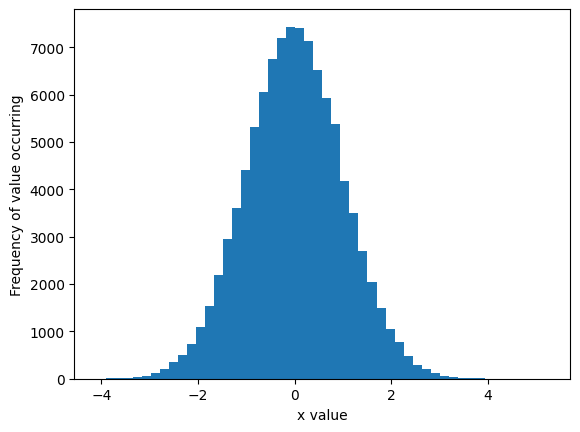

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate histogram data using NumPy
x = np.random.normal(size=100000)
hist,bin_edges = np.histogram(x,bins=50)

bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Both calculate and plot a histogram using matplotlib
plt.hist(x,bins=50)
plt.xlabel('x value')
plt.ylabel('Frequency of value occurring')
plt.show()

# Analysing pulses from a ‘channel electron multiplier’

We will now apply some of these statistical methods to a particular physical example. You may already have heard of a ‘mass-spectrometer’, which is a device that is used in physics, chemistry and materials science to analyse the composition of chemicals. Here, we will consider a series of
measurements from a ‘channel electron multiplier’, a component that is often used to count the ions that are produced in mass spectrometers.

The principle of a channel electron multiplier (often abbreviated to ‘CEM’, and also known by the commercial name ‘channeltron’) is shown in Figure 1. Energetic ions are directed into the cone-shaped entrance of the CEM. The impact of these ions causes several electrons to be ejected - these are known as ‘secondary electrons’. The secondary electrons are accelerated down the channel by a large voltage maintained between the ends (usually between 1 and 3 kV). The accelerated electrons then hit the channel walls again, producing further secondary electrons. The process repeats, each time generating more and more electrons, until a small bunch (or pulse) of electrons leaves the end of the channel.  The final pulse is big enough to measure using an electronic circuit. The pulse usually contains between $10^5$ and $10^7$ electrons, depending on the voltage being applied along the channel, and lasts about 10 ns.

In our measurement circuit, the electrons leaving the channeltron are passed through a $50 \Omega$ termination resistor.  The current causes a voltage across the resistor, which is measured using an oscilloscope, as shown in Figure 1.


>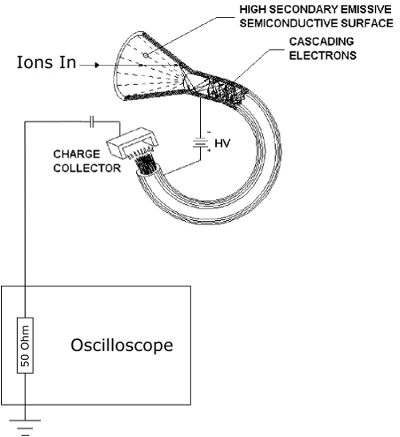
\
\
> **Figure 1:** Schematic diagram showing the principle of a channel electron multiplier (CEM) attached to a simple measurement circuit. Ions to be counted are directed into the entrance ‘cone’ at the front of the channeltron. Secondary electrons are produced and are accelerated along the channel, forming even more secondary electrons. The number of electrons is therefore muliplied as the pulse moves along the channel, and by the time it leaves the CEM, there is bunch of between $10^5$ and $10^7$ electrons.  These pass through the $50\Omega$ resistor over about 10 ns, thus forming a voltage pulse that is measured using an oscilloscope.


The next part of the session is to analyse a representative series of measurements from the above circuit and to plot a histogram showing the distribution of the **number of electrons** in the recorded pulses.  The file `cem.dat` is available on the course Moodle site, and contains a 100 individual measurements of pulse heights, **recorded in millivolts**.

\


**Scaling the Data from Voltage to Number of Electrons**

To convert the each measured voltage into the number of electrons in that pulse, we need to know the voltage produced by one electron flowing through the $R=50\Omega$ resistor in $\Delta t=10$ ns.

The average current through the resistor over $\Delta t$ is

$I = Q_{e}/\Delta t$,

so the voltage measured across the resistor is

$V = I R = Q_e R / \Delta t$

where $Q_e$ is the charge on an electron.

The voltage generated by each electron is calculated for you in the next code cell, but **make sure you understand the calculation**.

In [11]:
millivolts_per_electron = 1000 * 1.602e-19 * 50 / 10e-9
print('millivolts_per_electron =', millivolts_per_electron)

millivolts_per_electron = 8.01e-07


**Creating a Histogram of Pulse Heights**

We will now calculate some basic statistics and make a histogram of the data.

**Work through the following steps in the code cell below:**

1. Download `cem.dat` from the course Moodle site and upload it into Colab. Examine the data - you should find a series of pulse heights in millivolts - then import it into Python using the `numpy.genfromtxt()` routine.

2. Create a new array, representing the number of electrons in the pulses, by dividing the imported data by the scaling factor calculated above. Check the values in the new array seem reasonable, given the information in Figure 1 (i.e. that each pulse contains about the right number of electrons).

3. Find the mean number of electrons per pulse and the standard deviation of the number of electrons in the pulses.

4. Find the smallest and largest number of electrons in a pulse, and hence the range of the number of electrons. How does this compare with the standard deviation?

5. Make a labelled histogram showing the number of electrons in a pulse using the `matplotlib.pyplot.hist()` routine, **using 10 bins** and over the **range between 0 and $2 \times 10^6$ electrons**. What shape does the distribution look like?

Some comments are provided in the code-cell, to help you structure your work.

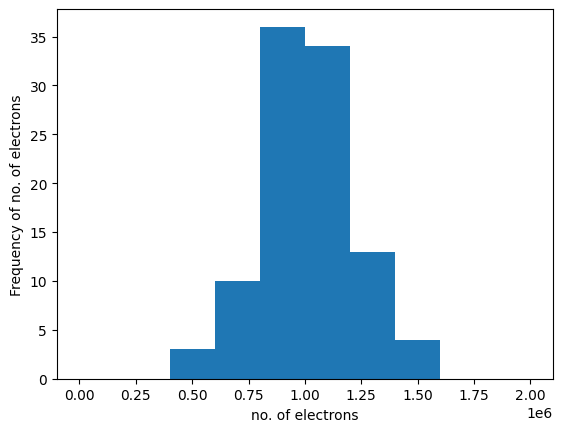

In [12]:
# This code cell is ready for you to complete the above tasks in it
import numpy as np
import matplotlib.pyplot as plt
millivolts_per_electron = 1000 * 1.602e-19 * 50 / 10e-9

# Import data from CEM.dat
data = np.genfromtxt('cem.dat')

# Convert data from pulse voltages into number of electrons
no_of_electrons = data/millivolts_per_electron

# Find mean and standard deviation
m = np.mean(no_of_electrons)
s = np.std(no_of_electrons)

# Find largest and smallest pulses
min = np.amin(no_of_electrons)
max = np.amin(no_of_electrons)


# Plot a histogram showing the results
plt.hist(no_of_electrons,bins=10,range=(0,2e6))
plt.xlabel('no. of electrons')
plt.ylabel('Frequency of no. of electrons')
plt.show()





**Fitting the Pulse Height Distribution**

Many physical processes are well approximated by a Gaussian or ‘Normal’ distribution, including our model CEM output pulses (the agreement is a result of the Central Limit Theorem, which will be covered in more detail elsewhere in your course). We will now explicitly compare your histogram with a Gaussian distribution.

A simple way to make the comparison is to fit a Gaussian curve to the histogram bin data. The resulting fit can then be overlaid on top of the histogram, making it easy to look for systematic differences. A normalised Gaussian curve is given by

$f\left(x\mid\mu,\sigma\right)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{\left(x-\mu\right)^{2}}{2\sigma^{2}}}$,

where $\mu$ and $\sigma$ are the mean and standard-deviation of the distribution, respectively. However, if the data is not normalised, as is the case for the data that you will be fitting today, it is necessary to allow for an extra normalisation variable,

$f\left(x\mid\mu,\sigma,A\right) = A e^{-\frac{\left(x-\mu\right)^{2}}{2\sigma^{2}}}$,

where $A$ represents a variable amplitude.

As you will recall from last week, you can fit a curve using the `scipy.optimise.curve_fit()` routine.

\

**Now work through the following** to compare your histogram to a Gaussian distribution:

1. Use the `np.histogram()` routine to find the bar heights for a **10 bar** histogram, and obtain the positions of the bin centres.

2. Use the `curve_fit()` to fit a Gaussian curve to the histogram bin data.  A Gaussian fit function has already been provided for you in the code-cell below.  However, this is a more challenging fit so you will need to provide an initial estimate of the fit parameters by adding the parameter `p0=(A_init,mu_init,sigma_init)` to the curve fit command.  You should replace `A_init`, `mu_init` and `sigma_init` with rough guesses for the initial values of $A$, $\mu$ and $\sigma$, from inspection of the previous histogram.

3. Plot a new histogram of the data, and superimpose a plot of your Gaussian fit on top of the histogram, to illustrate the fit. Again, use 10 bins in your histogram and set the range to be between 0 and $2 \times 10^6$ electrons. Remember, to plot the fit you should produce an array of '$x$' values over the range of the fit that you want to plot, then use the Gaussian fit function to calculate the '$y$' values over that range.

4. Find the values of $\mu$ and $\sigma$ for your fit, and compare these with the values for the mean and standard deviation of the individual measurements that you made earlier.

5. Make sure your figure axes are labelled. Add a suitable title and include the standard deviation of your fit within it.


popt= [3.96660065e+01 1.00353423e+06 1.95842659e+05]
[[ 1.94769727e+00 -6.48806646e+00 -6.51161378e+03]
 [-6.48806646e+00  6.25319386e+07  5.72825930e+04]
 [-6.51161378e+03  5.72825930e+04  6.41125045e+07]]


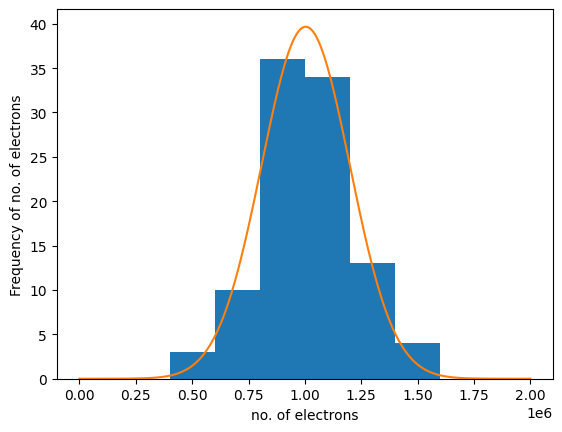

In [13]:
# This code cell is almost empty for you to complete the above tasks in it
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define non-normalised Gaussian function
def gaussian(x,A,mu,sigma):
  g = A * np.exp(-(x-mu)**2 / (2*sigma**2))
  return g

# Use numpy.hist() function to calculate histogram data
hist,bin_edges = np.histogram(no_of_electrons,bins=10, range=(0,2e6))

bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

x=np.linspace(0, 2e6, 1000)

popt,pcov = curve_fit(gaussian, bin_centres, hist, p0=(35,1e6,0.2e6))
print('popt=',popt)
print(pcov)







# Create histogram of result and superimpose plot

plt.hist(no_of_electrons,bins=10, range=(0,2e6))
plt.xlabel('no. of electrons')
plt.ylabel('Frequency of no. of electrons')


plt.plot(x,gaussian(x,*popt),'-',label='Fit')
plt.show()

# Analysing a series of experiments

Very often we wish to represent the statistical variation between measurements of a particular quantity using an “error-bar”. In science, we usually quote the results in the form $y \pm \sigma_y$ , where $\sigma_y$ is the one standard deviation error bar on the quantity y.

We can plot a graph with errorbars using the `matplotlib.pyplot.errorbar()` routine. The routine is very similar to the plot command, but requires three vectors for the x-data, the y-data, and the errors in the y-data, $\sigma_y$. For example:

```python
import matplotlib.pyplot as plt
plt.errorbar(x, y, sigma_y, fmt=’o’, capsize=3)
```

To illustrate these methods, we will analyse data representing a more extensive experiment on a channel electron multiplier.

\

CEMs work best when the output pulses are as large as possible, as this makes the (very small) voltage pulses as easy to detect as possible. The output pulses can be made larger by increasing the high voltage across the CEM (see Figure 1). However, if the voltage is too high, the CEM will ‘burn out’ prematurely, so we must choose an operating voltage that tries to balance these two competing factors effectively.

The files `pulses.dat` and `voltages.dat`, which are available on the course Moodle site, contain data representing a series of CEM pulse height measurements, at twelve different CEM high voltages:

* The file `voltages.dat` contains the CEM high voltages at which the experiments were performed (in Volts)

* The file `pulses.dat` contains a table of pulse height measurements (in millivolts, as in the previous section); each row corresponds to a particular CEM high voltage, while the ten columns relate to ten repetitions of the pulse height measurement.

\

**Work through the following** to analyse the data and choose a suitable CEM operating voltage:

1. Download the files `pulses.dat` and `voltages.dat` from Moodle and upload them to Colab. Examine the data and check you understand how the measurements are represented. Import both files using `np.genfromtxt()`.

2. Convert the pulse height data into numbers of electrons, as before.

3. Find the mean and standard deviation of each row of the pulse height matrix.

4. Plot a labelled graph with errorbars representing the expected number of electrons in each CEM pulse, as a function of the CEM high voltage.

5. Choose an approximate voltage that will give you most of the possible CEM ‘gain’ (say, about 90%) without increasing the high voltage too much.  (We are not looking for an accurate value.)

6. Add a suitable title to your figure, including your chosen operating voltage.




/var/folders/21/27_gy57n0s5d93lj2z_tbx580000gn/T/ipykernel_79744/1490664865.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


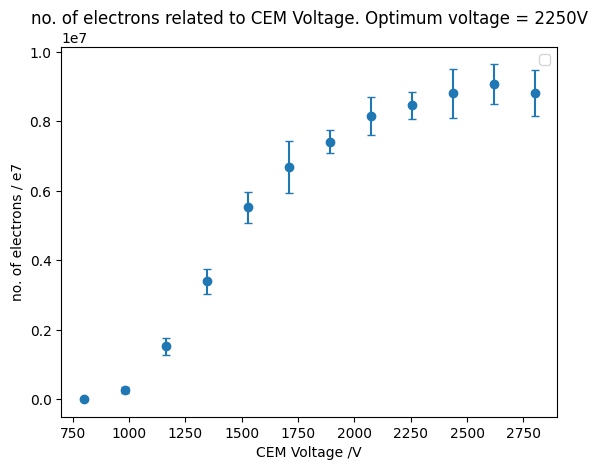

In [14]:
# This code cell is empty for you to complete the above tasks in it
import numpy as np
import matplotlib.pyplot as plt



# Import data and scale to numbers of electrons
voltages = np.genfromtxt('voltages.dat')
pulses = np.genfromtxt('pulses.dat')
no_of_electrons = pulses/millivolts_per_electron


# Calculate mean and standard deviation for each row of matrix
std_rows = np.std(no_of_electrons, axis=1)
m_electrons = np.mean(no_of_electrons, axis=1)

# Plot errobar graph with operating point in title
plt.errorbar(voltages, m_electrons, std_rows, fmt='o', capsize=3)
plt.ylabel('no. of electrons / e7')
plt.xlabel('CEM Voltage /V')
plt.title('no. of electrons related to CEM Voltage. Optimum voltage = 2250V')
plt.legend()



# Submitting Your Fourth Piece of Work for Credit

This week your work for credit consists of two parts: (i) your figure showing your Gaussian fit to the histogram of pulse heights; and (ii) your figure showing the pulse height versus CEM voltage.  You therefore need to **check and submit this Notebook**. Instructions are on the course Moodle site, which explain what you need to do, and how to check and submit your work.
